# Analytics in Retail


OBJECTIVE: Perform a task and create a report and display the calculated metrics, reports and inferences.
    

# Importing Libraries

In [1]:
#We are import the necessary libraries required 
import pandas as pd # pandas is used for data manipulation on dataframe
import numpy as np #numpy is  used for mathematical operation on array
import seaborn as sns # seaborn is used for data visualization
import matplotlib.pyplot as plt # matplotlib is used for data visualization
import warnings # handles warning generated by the code

# Loading the Dataset

In [2]:
df1=pd.read_csv(r"C:\Users\mahalakshmi\Downloads\Customer.csv") #Customer information

In [3]:
df2=pd.read_csv(r"C:\Users\mahalakshmi\Downloads\Transactions.csv") #Transaction of customers

In [4]:
df3=pd.read_csv(r"C:\Users\mahalakshmi\Downloads\prod_cat_info.csv")# Product information

In [5]:
df1.head()#Checking first 5 Rows and Columns in dataset 1

,customer_Id,DOB,Gender,city_code
0,268408,2/1/1970,M,4.0
1,269696,7/1/1970,F,8.0
2,268159,8/1/1970,F,8.0
3,270181,10/1/1970,F,2.0
4,268073,11/1/1970,M,1.0


In [6]:
df2.head()#Checking first 5 Rows and Columns in dataset 2

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [7]:
df3.head()#Checking first 5 Rows and Columns in dataset 3

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


# Merging the Dataset

In [8]:
df3.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'},inplace=True)

In [9]:
df = pd.merge(left = df2, right = df1 , how= 'inner', left_on ='cust_id', right_on ='customer_Id')
df = pd.merge(left = df, right = df3, how ='inner',on= ['prod_cat_code','prod_subcat_code'])

In [10]:
# write the merged dataframe to a new CSV file
df.to_csv('merged_file.csv', index=False)

In [11]:
df.shape #shape of the DataFrame after merging

(23053, 16)

In [12]:
df.head() #first 5 rows and columns after merging

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,8/6/1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women


# Checking for Duplicates

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23048    False
23049    False
23050    False
23051    False
23052    False
Length: 23053, dtype: bool

In [14]:
df.duplicated().sum()

13

In [15]:
#dropping the duplicated values
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

# Check for the null/missing values

In [17]:
df.isnull().sum()#check null vcalues 

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
customer_Id         0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64

In [18]:
df['Gender'].value_counts() #count of Gender

M    11804
F    11227
Name: Gender, dtype: int64

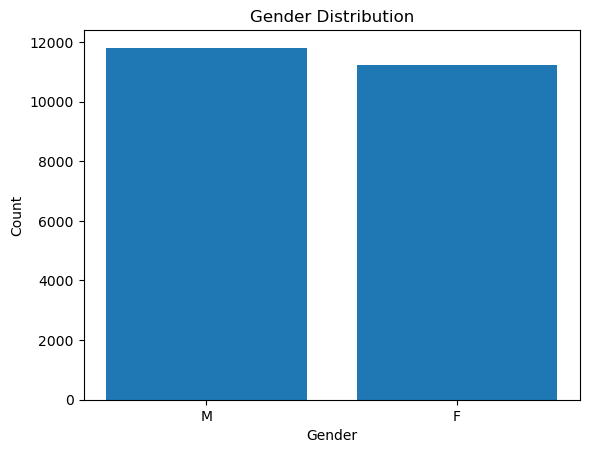

In [19]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [20]:
df['Gender'].mode() #here most repeated is Male so we are filling with this M=Male

0    M
Name: Gender, dtype: object

In [21]:
df['Gender'].fillna('M',inplace=True) #filled with M=Male

In [22]:
#we think city code is not necessary for our dataset hence its not that important
df.drop(['city_code'],axis=1,inplace=True)


In [23]:
df.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
customer_Id         0
DOB                 0
Gender              0
prod_cat            0
prod_subcat         0
dtype: int64

Now here we can see there is no more null values.

# Summary report for all the columns.

In [24]:
df.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000


In [25]:
df.describe(include=['object']) #summary to check categorical columns

,tran_date,Store_type,DOB,Gender,prod_cat,prod_subcat
count,23040,23040,23040,23040,23040,23040
unique,1129,4,3987,2,6,18
top,13-07-2011,e-Shop,27-12-1988,M,Books,Women
freq,35,9304,32,11813,6066,3046


# Percentage of products bought by men and women (clothes).

In [26]:
df['prod_cat'].value_counts() #checking different types of product category

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

In [27]:
# filter the data to include only the Clothes category
clothes_df = df[df['prod_cat'] == 'Clothing']


In [28]:
# group the data by Gender, and count the number of products
cloth_group = clothes_df.groupby('Gender')['prod_cat'].count()


In [29]:
# calculate the percentage of clothes bought by each gender
total_clothes = cloth_group.sum()
percentage = cloth_group / total_clothes * 100

In [30]:
# print the result
print(percentage)

Gender
F    48.614865
M    51.385135
Name: prod_cat, dtype: float64


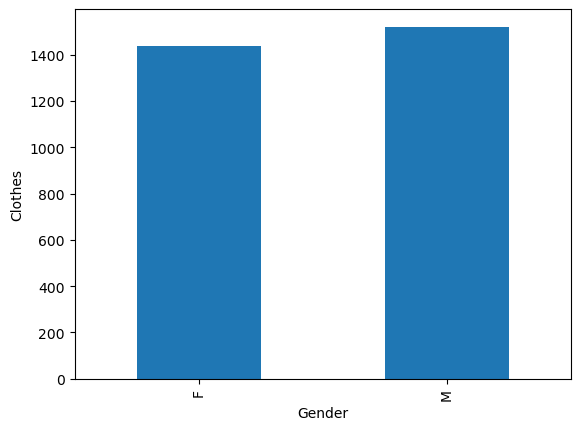

In [31]:

# create a bar plot of the sold_by_store data
cloth_group.plot.bar()

# add x-label and y-label
plt.xlabel('Gender')
plt.ylabel('Clothes')

# show the plot
plt.show()

# Percentage of products bought by men and women (footwear).


In [32]:
df['prod_cat'].value_counts() #checking different types of product category

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

In [33]:
# filter the data to include only the Footwear category
footwear_df = df[df['prod_cat'] == 'Footwear']

In [34]:
# group the data by Gender, and count the number of products
foot_group = footwear_df.groupby('Gender')['prod_cat'].count()

In [35]:
# calculate the percentage of footwear bought by each gender
total_footwear = foot_group.sum()
percentage = foot_group / total_footwear * 100

In [36]:
# print the result
print(percentage)

Gender
F    51.001335
M    48.998665
Name: prod_cat, dtype: float64


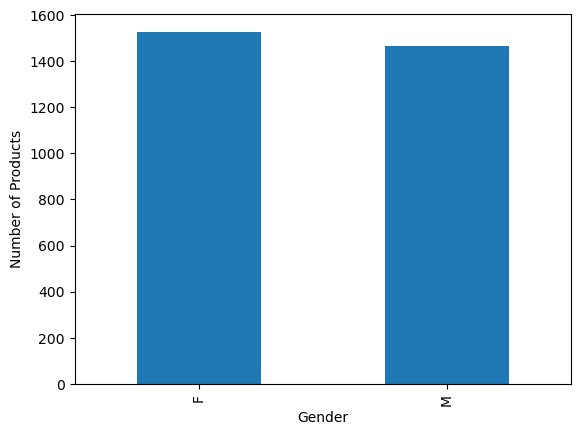

In [37]:
foot_group.plot.bar()

# add x-label and y-label
plt.xlabel('Gender')
plt.ylabel('Number of Products')

# show the plot
plt.show()

# Types of stores , and which type of stores sells maximum of products

In [38]:
#types of stores
df['Store_type'].unique()

array(['e-Shop', 'Flagship store', 'MBR', 'TeleShop'], dtype=object)

In [39]:
 df['Store_type'].max() #max products sold

'e-Shop'

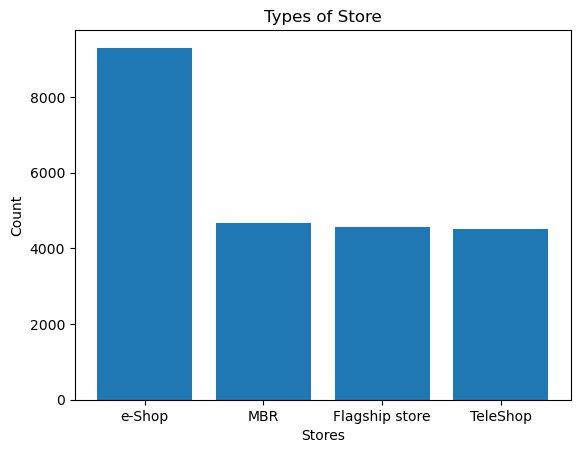

In [40]:
store_counts = df['Store_type'].value_counts()
plt.bar(store_counts.index, store_counts.values)
plt.title('Types of Store')
plt.xlabel('Stores')
plt.ylabel('Count')
plt.show()

# Types of book is selling the most

In [41]:
df['prod_subcat'].unique() #find unique values 

array(['Women', 'Personal Appliances', 'DIY', 'Computers', 'Mens',
       'Tools', 'Children', 'Fiction', 'Mobiles', 'Bath',
       'Audio and video', 'Non-Fiction', 'Kids', 'Furnishing', 'Cameras',
       'Academic', 'Kitchen', 'Comics'], dtype=object)

In [42]:
df['Qty'].unique()

array([-5,  5,  3, -4,  4,  1,  2, -2, -3, -1], dtype=int64)

In [43]:
# Filter the DataFrame to include only books
books_df = df[df['prod_cat'] == 'Books']

# Sort the books DataFrame by sales in ascending order
sorted_books_df = books_df.sort_values('Qty', ascending=False)

# Get the most selling book
most_selling_book = sorted_books_df.iloc[0]['prod_subcat']

# Print the most selling book
print("The most selling book is:", most_selling_book)

The most selling book is: Comics


# Total amount spent by men on Electronics

In [44]:
# Filter the data to include only purchases made by men on electronics
men_electronics = df[(df['Gender'] == 'M') & (df['prod_cat'] == 'Electronics')]

In [45]:
# Calculate the total amount spent by men on electronics
total_spent = men_electronics['total_amt'].sum()


In [46]:
print("Total amount spent by men on electronics:", total_spent)


Total amount spent by men on electronics: 5711351.62


# Total amount spent by women on clothing

In [47]:
# Filter the data to include only purchases made by women on clothing
women_clothing = df[(df['Gender'] == 'F') & (df['prod_cat'] == 'Clothing')]

In [48]:
# Calculate the total amount spent by women on clothing
total_spent = women_clothing['total_amt'].sum()

In [49]:
print("Total amount spent by women on clothing:", total_spent)


Total amount spent by women on clothing: 3026750.8050000006


# Total amount spent on furnishings

In [50]:
# Filter the data to include only purchases made on furnishings
furnishings = df[df['prod_subcat'] == 'Furnishing']

In [51]:

# Calculate the total amount spent on furnishings
total_spent = furnishings['total_amt'].sum()

In [52]:
# Print the results
print("Total amount spent on furnishings:", total_spent)

Total amount spent on furnishings: 2098595.0050000004


# Who read most Books (Men/Women)

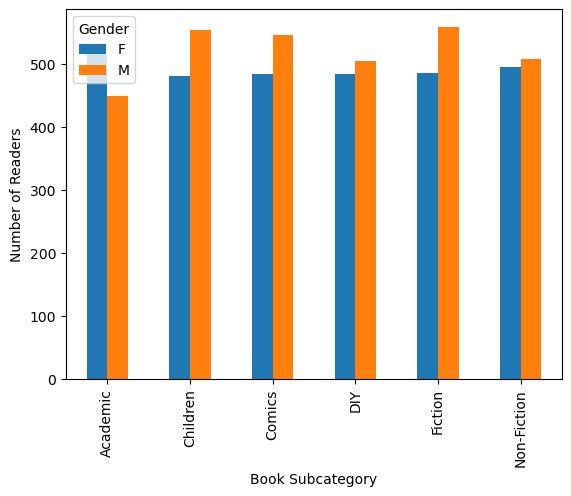

In [53]:
# Filter the DataFrame to include only the rows where prod_cat is "Books"
books_df = df[df['prod_cat'] == 'Books']

# Group the data by gender and subcategory
grouped_data = books_df.groupby(['Gender', 'prod_subcat']).size().reset_index(name='count')

# Plot a bar chart to visualize the results
fig, ax = plt.subplots()
grouped_data.pivot(index='prod_subcat', columns='Gender', values='count').plot(kind='bar', ax=ax)

# set the x-axis and y-axis labels for the chart.
ax.set_xlabel('Book Subcategory')
ax.set_ylabel('Number of Readers')

#show chart
plt.show()

From above plot we can tell that men reads more books than women.

# Type of books men read more

In [54]:
# Filter the DataFrame to include only the rows where prod_cat is "Books"
books_df = df[df['prod_cat'] == 'Books']
#dataframe which shows only men
men_books_df = books_df[books_df['Gender'] == 'M']
# Group the data by gender and qty
grouped_data = men_books_df.groupby('prod_subcat')['Qty'].sum().reset_index(name='total_count')
#sorting into ascending 
sorted_data = grouped_data.sort_values('total_count', ascending=False)
# Get the types of books
most_popular_subcat = sorted_data.iloc[0]['prod_subcat']
print("The type of book that men read more is:", most_popular_subcat)

The type of book that men read more is: Fiction


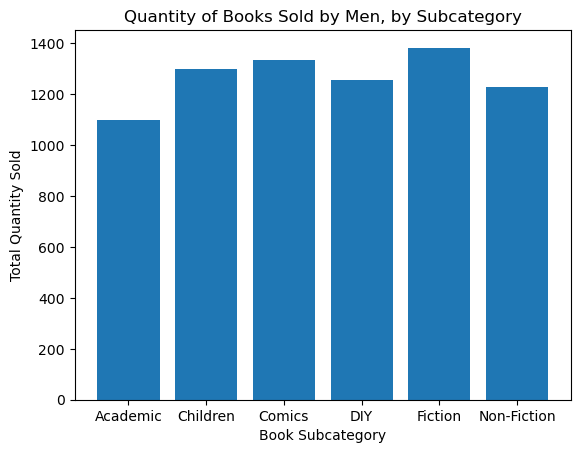

In [55]:
import matplotlib.pyplot as plt

# Create a bar plot of the grouped data
plt.bar(grouped_data['prod_subcat'], grouped_data['total_count'])

# Add labels and title
plt.xlabel('Book Subcategory')
plt.ylabel('Total Quantity Sold')
plt.title('Quantity of Books Sold by Men, by Subcategory')

# Show the plot
plt.show()

# Type of books Women read more

In [56]:
# Filter the DataFrame to include only the rows where prod_cat is "Books"
books_df1 = df[df['prod_cat'] == 'Books']
#dataframe which shows only women
women_books_df = books_df1[books_df1['Gender'] == 'F']
# Group the data by gender and qty
grouped_df = women_books_df.groupby('prod_subcat')['Qty'].sum().reset_index(name='total_count')
#sorting into ascending 
sorted_df = grouped_df.sort_values('total_count', ascending=False)
# Get the types of books
most_popular = sorted_df.iloc[0]['prod_subcat']
print("The type of book that women read more is:", most_popular)

The type of book that women read more is: Non-Fiction


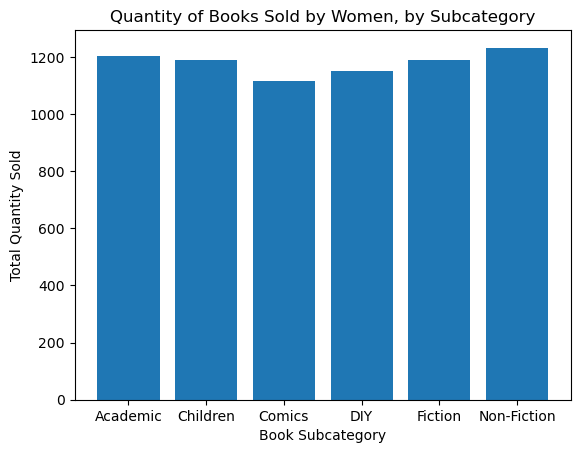

In [57]:
import matplotlib.pyplot as plt

# Create a bar plot of the grouped data
plt.bar(grouped_df['prod_subcat'], grouped_df['total_count'])

# Add labels and title
plt.xlabel('Book Subcategory')
plt.ylabel('Total Quantity Sold')
plt.title('Quantity of Books Sold by Women, by Subcategory')

# Show the plot
plt.show()

# Most selling Electronics 

In [58]:
#Filter the DataFrame to include only Electronics
electronic_df = df[df['prod_cat'] == 'Electronics']

# Sort the books DataFrame by sales in descending order
sorted_electronic_df = electronic_df.sort_values('Qty', ascending=False)

# Get the most selling Electronics
most_selling_electronic = sorted_electronic_df.iloc[0]['prod_subcat']

# Print the most selling Electronics
print("The most selling Electronic is:", most_selling_electronic)

The most selling Electronic is: Mobiles


# Total amount spent by customers

In [59]:
# Convert the trandate column to datetime type
df['tran_date'] = pd.to_datetime(df['tran_date'])

# Filter the DataFrame to include only the rows where InvoiceDate is between 1st January 2012 and 31st December 2012
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2012-12-31')
filtered_df = df[(df['tran_date'] >= start_date) & (df['tran_date'] <= end_date)]

# Calculate the total amount spent by customers during the filtered period
total_amount_spent = (filtered_df['Qty'] * filtered_df['Rate']).sum()

# Print the result
print("The total amount spent by customers between 1st January 2012 and 31st December 2012 is:", total_amount_spent)


C:\Users\mahalakshmi\AppData\Local\Temp\ipykernel_17368\3151495050.py:2: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['tran_date'] = pd.to_datetime(df['tran_date'])
C:\Users\mahalakshmi\AppData\Local\Temp\ipykernel_17368\3151495050.py:2: UserWarning: Parsing '20-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['tran_date'] = pd.to_datetime(df['tran_date'])
C:\Users\mahalakshmi\AppData\Local\Temp\ipykernel_17368\3151495050.py:2: UserWarning: Parsing '16-12-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['tran_date'] = pd.to_datetime(df['tran_date'])
C:\Users\mahalakshmi\AppData\Local\Temp\ipykernel_17368\3151495050.py:2: UserWarning: Parsing '16-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['tran_date'] = 

The total amount spent by customers between 1st January 2012 and 31st December 2012 is: 17825308


# Time period of the available transaction data. 

In [60]:
# Convert the InvoiceDate column to datetime
df['tran_date'] = pd.to_datetime(df['tran_date'], format='%Y-%m-%d %H:%M:%S')

# Find the earliest and latest dates in the InvoiceDate column
earliest_date = df['tran_date'].min()
latest_date = df['tran_date'].max()

# Calculate the time difference between these two dates
time_period = latest_date - earliest_date

# Print the result
print(f"The time period of the available transaction data is {time_period.days} days.")

The time period of the available transaction data is 1430 days.


# Count of transactions where the total amount of transaction was negative

In [61]:
# count the number of transactions where the total amount was negative
negative_transactions_count = (df['total_amt'] < 0).sum()

print(f'Number of transactions with negative total amount: {negative_transactions_count}')

Number of transactions with negative total amount: 2164


# Visualization

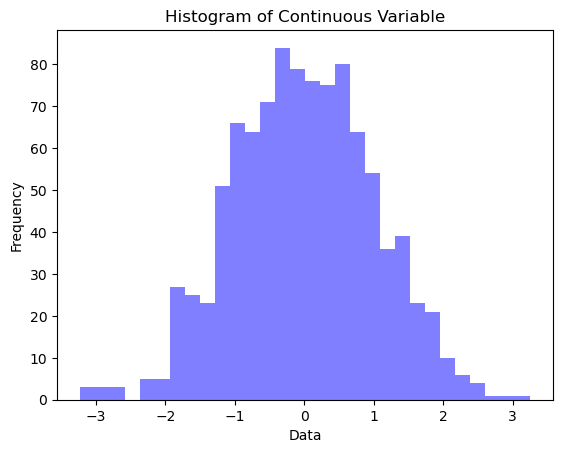

In [62]:
# Generate some random data
continous = np.random.normal(size=1000)

# Create the histogram
plt.hist(continous, bins=30, alpha=0.5, color='blue')

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Continuous Variable')

# Show the plot
plt.show()

Here we can see tha Data is normally distributed

In [64]:
#To find correlation between features
corr = df.corr()

In [65]:
corr.shape

(9, 9)

<AxesSubplot:>

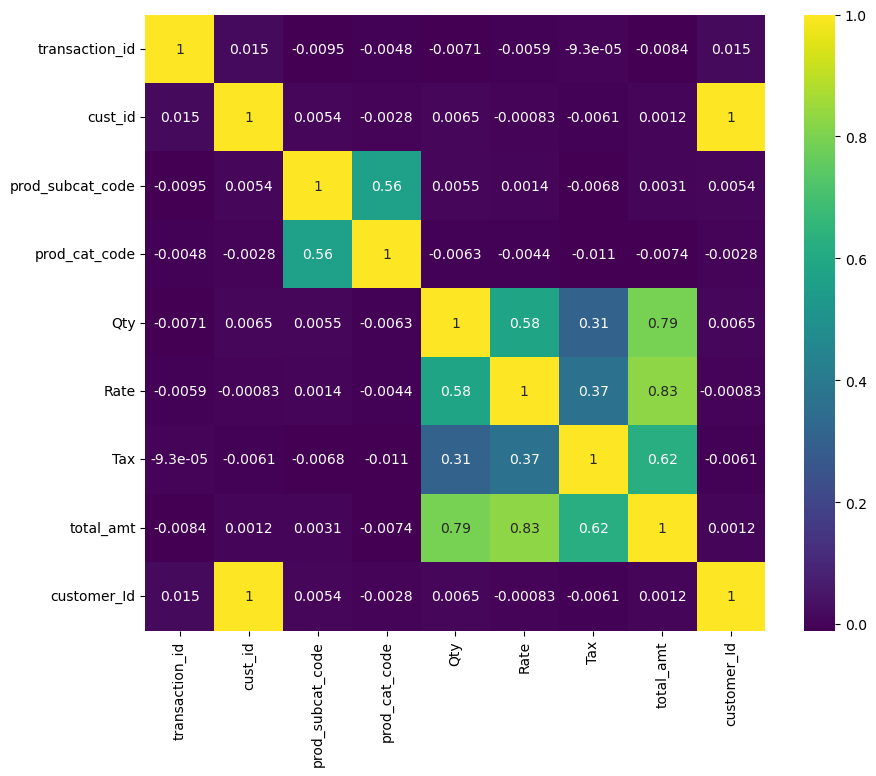

In [66]:
# Create a heatmap of the correlation matrix with a larger size
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', ax=ax)

The primary objective of creating a correlation map is to visualize the relationships between the different variables in a dataset. The correlation map can help identify which variables are strongly related to each other.



From the above heatmap we can say that total_amt is strongly correlated and total_amt will be our target variable

C:\Users\mahalakshmi\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tax', ylabel='Density'>

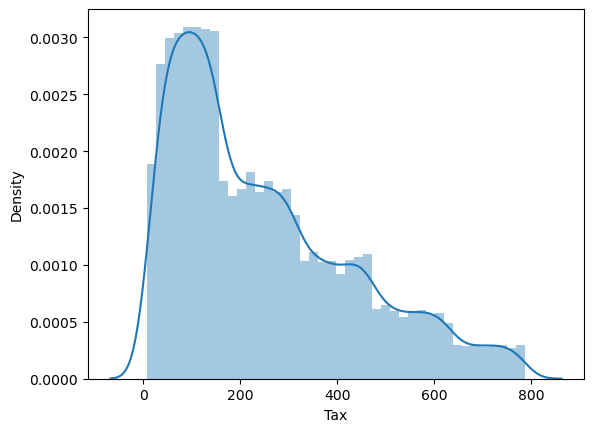

In [67]:
sns.distplot(df.Tax)

From the above graph we have left-skewed distribution, also known as a negatively skewed distribution, is a type of distribution in which the tail of the distribution is longer on the left side than on the right side. This means that the majority of the data is located on the right side of the distribution, with a few extreme values on the left side.

# Categorical to Numerical

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
# Loop through each object column and apply LabelEncoder
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [70]:
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,3,270351,2586,1,2,17
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,3,270351,2586,1,2,17
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,0,271509,3815,1,2,17
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,0,267750,673,1,2,17
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,0,267750,673,1,2,17


In [71]:
df.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                   int32
customer_Id                  int64
DOB                          int32
Gender                       int32
prod_cat                     int32
prod_subcat                  int32
dtype: object

Using transaction_initiation to create columns[Month,Day,Time]

In [72]:
df['year'] = df['tran_date'].dt.year
df['month'] = df['tran_date'].dt.month
df['day'] = df['tran_date'].dt.day
df.drop(columns='tran_date',axis='column',inplace=True)

In [73]:
df.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,prod_cat,prod_subcat,year,month,day
0,80712190438,270351,1,1,-5,-772,405.300,-4265.300,3,270351,2586,1,2,17,2014,2,28
1,80712190438,270351,1,1,5,772,405.300,4265.300,3,270351,2586,1,2,17,2014,2,20
2,18505840838,271509,1,1,3,1229,387.135,4074.135,0,271509,3815,1,2,17,2013,12,16
3,92814475704,267750,1,1,-4,-284,119.280,-1255.280,0,267750,673,1,2,17,2013,8,16
4,92814475704,267750,1,1,4,284,119.280,1255.280,0,267750,673,1,2,17,2013,7,8


# Outliers detection and treatment

In statistics, an outlier is an observation or data point that is significantly different from other observations in the dataset. 

In [74]:
df.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,prod_cat,prod_subcat,year,month,day
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,1.804427,271021.880252,1990.941450,0.512717,2.573134,9.650391,2012.112717,6.502865,15.663108
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,1.167115,2431.573668,1143.785257,0.499849,1.620472,5.215446,0.893871,3.475034,8.872035
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,0.000000,266783.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,1.000000,268935.000000,1013.000000,0.000000,1.000000,5.000000,2011.000000,3.000000,8.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,2.000000,270980.500000,1999.000000,1.000000,3.000000,10.000000,2012.000000,7.000000,16.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,3.000000,273114.250000,2964.000000,1.000000,4.000000,14.000000,2013.000000,10.000000,23.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,3.000000,275265.000000,3986.000000,1.000000,5.000000,17.000000,2014.000000,12.000000,31.000000


In [75]:
# Get summary statistics of the data
df_desc = df.describe()

# Calculate the IQR for each column
Q1 = df_desc.loc['25%']
Q3 = df_desc.loc['75%']
IQR = Q3 - Q1

# Identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=0)

# Print the columns with potential outliers
print("Columns with potential outliers:\n", outliers[outliers].index)


Columns with potential outliers:
 Index(['Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')


In [76]:
df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)] = df.median() 
#Replace outliers with the median



In this demo we will follow the IQR approach to filter and deal witg outliers. as we know that lower limit for any observation is Q1- 1.5* IQR and upper limit is Q3 + 1.5 IQR
these terms are as follow:


- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3- Q1

# Split the Data

In [77]:
from sklearn.model_selection import train_test_split # For spliting the data

In [78]:
y=df["total_amt"]
X=df.drop('total_amt',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=102)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18432, 16)
(4608, 16)
(18432,)
(4608,)


In [80]:
num_attr=X_train.select_dtypes(['int','float']).columns
num_attr

Index(['transaction_id', 'cust_id', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'Store_type', 'customer_Id', 'DOB', 'Gender', 'prod_cat',
       'prod_subcat', 'year', 'month', 'day'],
      dtype='object')

# Standardizing the Data

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
X_train[num_attr]=scaler.fit_transform(X_train[num_attr])

In [84]:
X_test[num_attr]=scaler.transform(X_test[num_attr])

In [85]:
print(X_train.shape)
print(X_test.shape)

(18432, 16)
(4608, 16)


# Model Building

In [86]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [87]:
# Create linear regression model object
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9049989572544559


In [88]:
df1=pd.DataFrame(df['cust_id'],columns=['cust_id'])
df2=pd.DataFrame(y_pred,columns=['total_amt'])
df=pd.concat([df1,df2], axis=1)
df

,cust_id,total_amt
0,270351.0,1806.642257
1,270980.5,1806.642257
2,270980.5,1806.642257
3,267750.0,1806.642257
4,270980.5,1806.642257
...,...,...
23051,270980.5,NaN
23052,270980.5,NaN
1360,NaN,1806.642257
2866,NaN,1806.642257


In [89]:
# Save to csv file
df.to_csv('analyticsinretail.csv')

Thank You
